In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score
from sklearn.model_selection import StratifiedKFold


In [2]:

df = pd.read_csv('./spambase/spambase.data', delimiter=';')
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
df.shape

(4601, 58)

In [4]:
columns_list = []
for i in df.columns[:-1]:
    media = np.mean(df[i])
    desvpad = np.std(df[i])
    if (desvpad > media * 3 and desvpad > 1):
        print(f'{i}')
        print(f'media : {media}')
        print(f'desvio padrão : {desvpad}')
        print('-------')
        columns_list.append(i)

word_freq_address
media : 0.21301456205172786
desvio padrão : 1.2904349339008443
-------
word_freq_3d
media : 0.06542490762877635
desvio padrão : 1.394999748325344
-------
word_freq_font
media : 0.12120191262768963
desvio padrão : 1.0256441144337263
-------
word_freq_hp
media : 0.5495044555531406
desvio padrão : 1.6711677034900316
-------
word_freq_george
media : 0.767304933710063
desvio padrão : 3.3669258521388494
-------
word_freq_re
media : 0.30122364703325366
desvio padrão : 1.0115772792026325
-------
capital_run_length_average
media : 5.191515105411866
desvio padrão : 31.726000449297825
-------
capital_run_length_longest
media : 52.17278852423386
desvio padrão : 194.8701291417326
-------


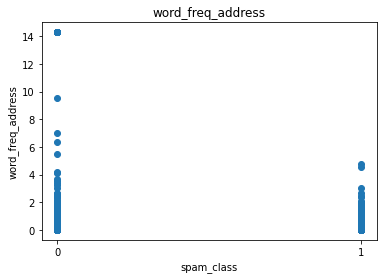

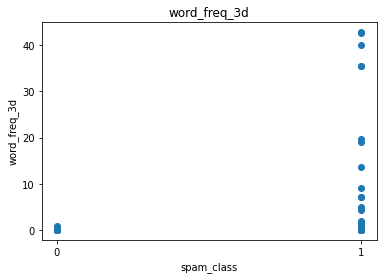

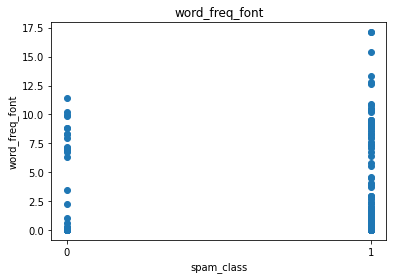

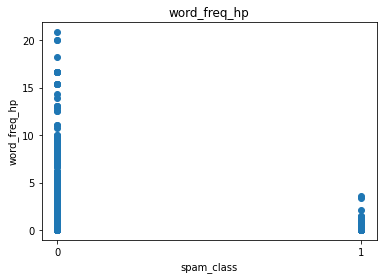

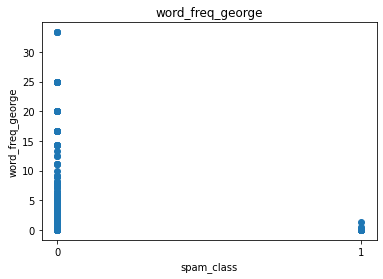

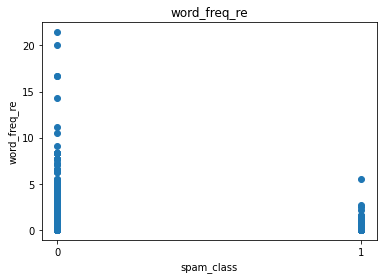

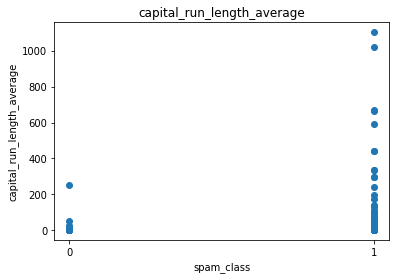

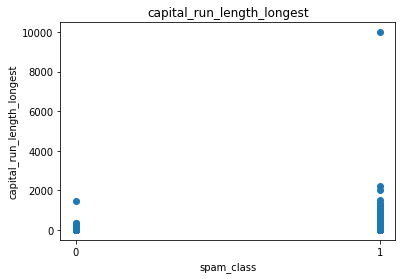

In [5]:
for label in columns_list:
    plt.scatter(df['spam_class'], df[label])
    plt.xticks(np.arange(0, 2, step = 1))
    plt.title(label)
    plt.xlabel('spam_class')
    plt.ylabel(label)
    plt.show()

In [6]:
df_c = df.drop(columns=['word_freq_font', 'word_freq_hp', 'word_freq_george', 'word_freq_re', 'word_freq_3d', 'word_freq_address']).copy()

In [7]:
x = df_c[df_c.columns[:-1]].values
y = df_c['spam_class'].values
sc = StandardScaler()
x = sc.fit_transform(x, y)

In [8]:
model1 = [DecisionTreeClassifier(), "Decision Tree"]
model2 = [MLPClassifier(hidden_layer_sizes=(20,2), max_iter=1000), "MLP"]
model3 = [RandomForestClassifier(), "Random Forest"]
model4 = [SVC(kernel='linear'),'SVM-Linear']

models = [model1, model2, model3, model4]

In [9]:
skf = StratifiedKFold(n_splits=10)

for mod in models:
    acc = []
    f1 = []
    precision = []

    for train_indexs, test_indexs in skf.split(x, y):
        x_train, y_train = x[train_indexs], y[train_indexs]
        x_test, y_test = x[test_indexs], y[test_indexs]
        model = mod[0]
        model.fit(x_train, y_train)
        y_predicted = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_predicted)
        f1_scr = f1_score(y_test, y_predicted)
        prec_score = precision_score(y_test, y_predicted)
        matrix = confusion_matrix(y_test, y_predicted)
        acc.append(accuracy)
        f1.append(f1_scr)
        precision.append(prec_score)
        print(matrix)
        print()

    print(f"{mod[1]}, Accuracy:\t{np.mean(acc):.2f} +/- {np.std(acc):.2f}")
    print(f"{mod[1]}, F1 Score:\t{np.mean(f1):.2f} +/- {np.std(f1):.2f}")
    print(f"{mod[1]}, Precision:\t{np.mean(precision):.2f} +/- {np.std(precision):.2f}")
    print("-"*60)

[[255  24]
 [ 24 158]]

[[259  19]
 [ 21 161]]

[[255  23]
 [ 25 157]]

[[256  23]
 [ 25 156]]

[[247  32]
 [ 22 159]]

[[256  23]
 [ 17 164]]

[[270   9]
 [ 35 146]]

[[248  31]
 [ 21 160]]

[[234  45]
 [ 24 157]]

[[234  45]
 [ 35 146]]

Decision Tree, Accuracy:	0.89 +/- 0.03
Decision Tree, F1 Score:	0.86 +/- 0.03
Decision Tree, Precision:	0.85 +/- 0.05
------------------------------------------------------------
[[266  13]
 [ 31 151]]

[[267  11]
 [ 22 160]]

[[264  14]
 [ 23 159]]

[[264  15]
 [ 22 159]]

[[266  13]
 [ 13 168]]

[[257  22]
 [ 13 168]]

[[271   8]
 [ 21 160]]

[[265  14]
 [ 16 165]]

[[227  52]
 [ 14 167]]

[[257  22]
 [ 38 143]]

MLP, Accuracy:	0.91 +/- 0.03
MLP, F1 Score:	0.89 +/- 0.03
MLP, Precision:	0.90 +/- 0.05
------------------------------------------------------------
